In [2]:
import os
os.chdir('/data/wjk/Workspace/Datasets/IGR')

import os.path as osp
import pandas as pd
pd.set_option('display.width', 500)    #设置整体宽度
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mtools import plot_cdf, plot_fig, load_json

df = pd.read_csv('Output/stat_df.csv')
exclude_phone = ['Mi8']
df=df[~df.isin(exclude_phone)]
df["err_h"]*=100
df["err_x"]*=100
df["err_y"]*=100
df["length"] = np.sqrt(df["gt_x"]**2 + df["gt_y"]**2)
pdf = df.rename(columns={'err_x':'Noise east (cm)','err_y':'Noise north (cm)', 'phone':'Device'})

pdf["Route type"] = pdf["route"]
pdf["trip"] = pdf["trip"]
pdf["Train type"] = pdf["trip"]
# route_type_dict = load_json(osp.join('plots', 'route_type_dict.json'))
# train_type_dict = load_json(osp.join('plots', 'train_type_dict.json'))
# for route in route_type_dict:
#     pdf.loc[pdf.__getattr__("Route type") == route, ('Route type')] = route_type_dict[route]
# for route in train_type_dict:
#     pdf.loc[pdf.__getattr__("Train type") == route, ('Train type')] = train_type_dict[route]

print(df.groupby('phone').mean(numeric_only=True))

              err_x     err_y      err_h      gt_x      gt_y    length
phone                                                                 
Oneplus9r -0.150165  0.049991  13.519649  0.054446  0.097107  1.180705


In [2]:
df[["err_x","err_y","gt_x","gt_y"]].corr().to_csv('Output/corr.csv')
des = df.groupby('phone')["err_h"].describe(percentiles=[.2, .25, .5, .75, .8, 0.9])
print(des)
# des.to_csv('Output/error_info.csv')

des = pdf.groupby('Route type')["err_h"].describe(percentiles=[.2, .25, .5, .75, .8, 0.9])
print(des)
# des.to_csv('Output/error_info_bytype.csv')

des = df.groupby('phone')["length"].describe(percentiles=[.2, .25, .5, .75, .8, 0.9])
print(des)
# des.to_csv('Output/length_info.csv')

            count       mean        std       min        20%        25%        50%        75%        80%        90%         max
phone                                                                                                                          
Mate40E    1968.0  25.641916  17.966702  0.305762  11.636793  13.712252  22.336913  32.993160  36.211017  46.848103  213.651089
Nova9pro   2076.0  13.155510   8.796444  0.079517   6.246696   7.111961  11.439857  16.782479  18.519182  24.145887   80.630640
Oneplus9r  2076.0  16.398839  11.969603  0.266896   7.476542   8.528171  13.589026  20.860205  22.923567  30.547516  105.836867
                   count       mean        std       min        20%        25%        50%        75%        80%        90%         max
Route type                                                                                                                            
23_04_25_16_49_30  519.0  15.444847  12.233695  0.266896   7.118921   8.307731  12.906803 

In [4]:
# pdf.columns
item_index = pdf.columns.to_list().index('Train type')
print(pdf.columns.to_list())

# train_pdf = pdf.loc[pdf['Train type']=='train']
# des = train_pdf.groupby('Device')["err_h"].describe(percentiles=[.2, .25, .5, .75, .8, 0.9])
# print(des)

['Noise east (cm)', 'Noise north (cm)', 'err_h', 'gt_x', 'gt_y', 'Device', 'trip', 'length', 'Route type', 'Train type']


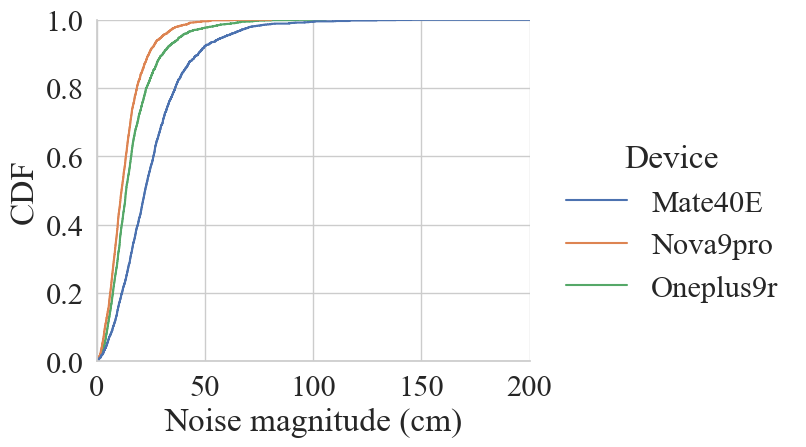

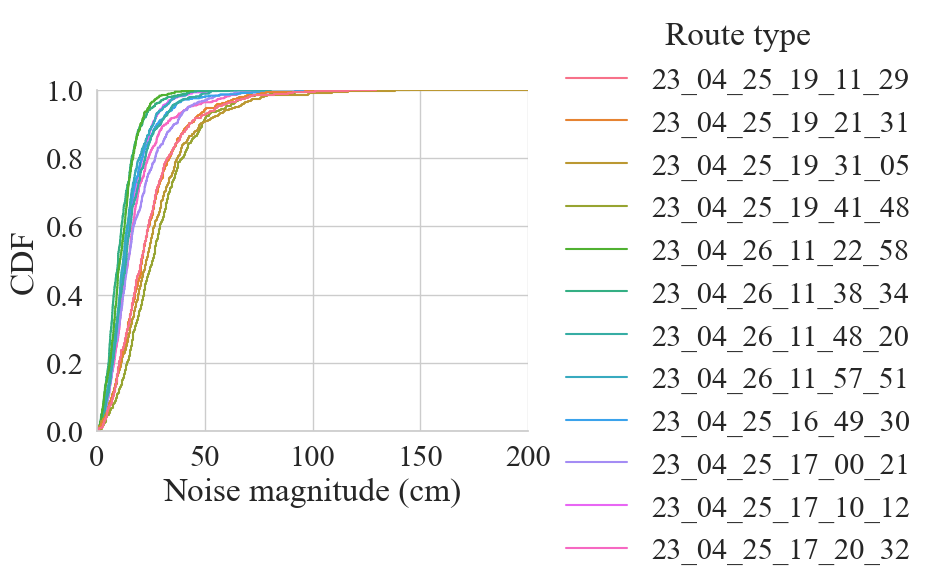

In [5]:
# g = plot_cdf(df, 'err_h', xlabel='Noise magnitude (cm)', xlim=[0, 200], plot_params={'aspect':1.2})
# plt.show()
# g.savefig('Figures/err_h_cdf.png', dpi=150, pad_inches=0.2)

g = plot_cdf(pdf, 'err_h', xlabel='Noise magnitude (cm)', xlim=[0, 200], fig_param={'font_scale':2.0}, plot_params={'aspect':1.2, 'hue':'Device'}) # 'col':'phone', 'col_wrap': 4
plt.show()
# g.savefig('Figures/err_h_cdf_byphone.png', dpi=150, pad_inches=0.2)

g = plot_cdf(pdf, 'err_h', xlabel='Noise magnitude (cm)', xlim=[0, 200], fig_param={'font_scale':2.0}, plot_params={'aspect':1.2, 'hue':'Route type'}) # 'col':'phone', 'col_wrap': 4
plt.show()
# g.savefig('Figures/err_h_cdf_bytype.png', dpi=150, pad_inches=0.2)

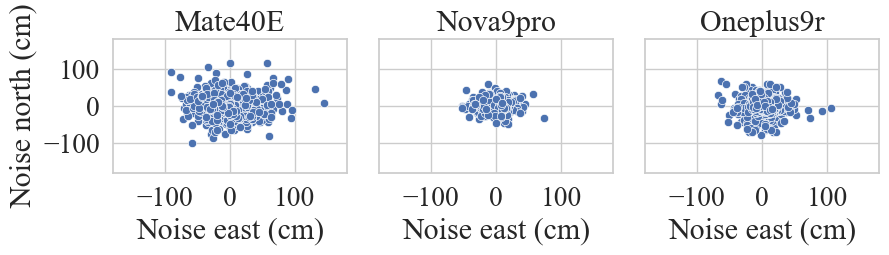

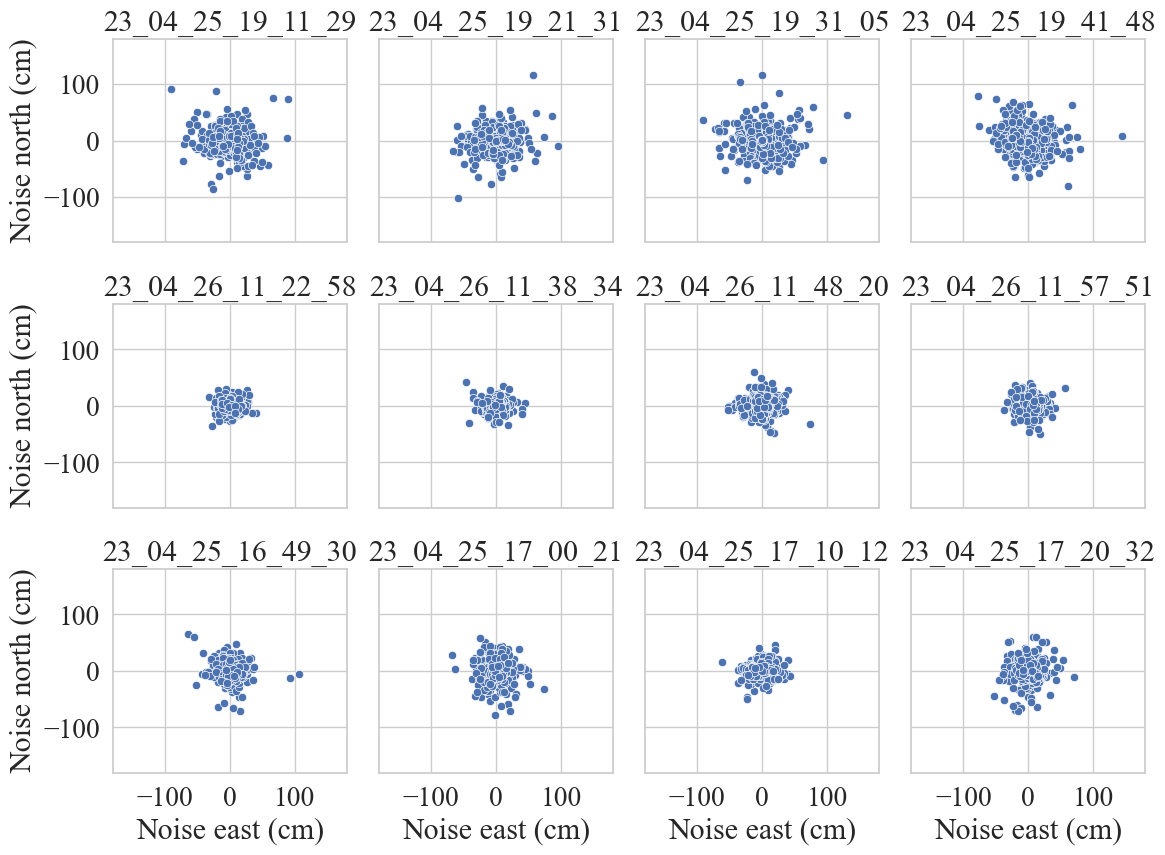

In [6]:
sns.set(**{'style':'whitegrid', 'font_scale':1.8, 'font':'Times New Roman'})
g = sns.FacetGrid(pdf, col="Device",  col_wrap=4, xlim=[-180, 180], ylim=[-180, 180], despine=False)
g.map(sns.scatterplot, "Noise east (cm)", "Noise north (cm)")
g.set_titles("{col_name}")

plt.show()
# g.savefig('Figures/err_scatter_byphone.png', dpi=150, pad_inches=0.2)

sns.set(**{'style':'whitegrid', 'font_scale':1.8, 'font':'Times New Roman'})
g = sns.FacetGrid(pdf, col="Route type",  col_wrap=4, xlim=[-180, 180], ylim=[-180, 180], despine=False)
g.map(sns.scatterplot, "Noise east (cm)", "Noise north (cm)")
g.set_titles("{col_name}")
plt.show()
# g.savefig('Figures/err_scatter_bytype.png', dpi=150, pad_inches=0.2)

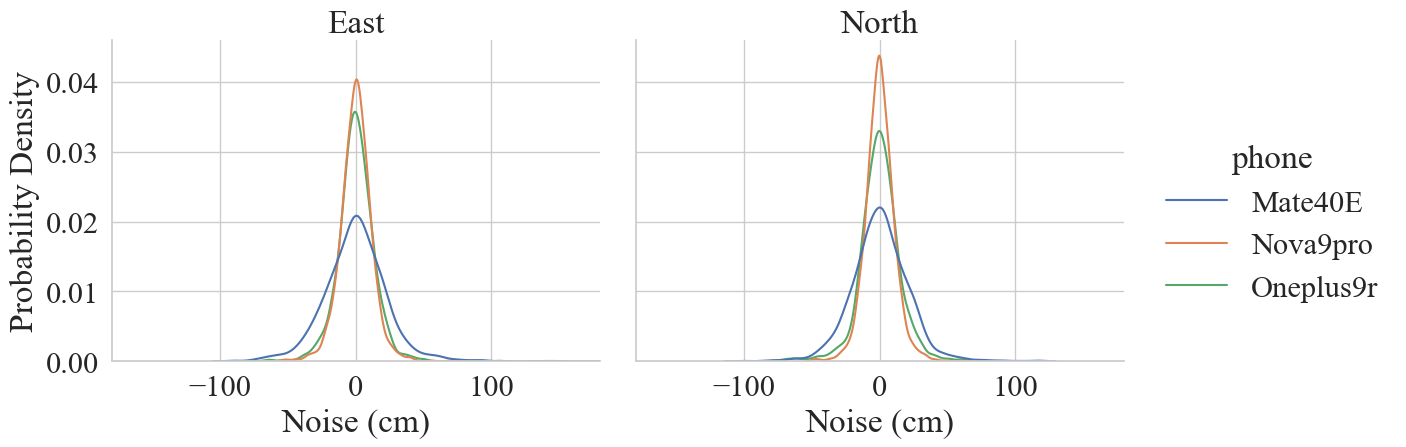

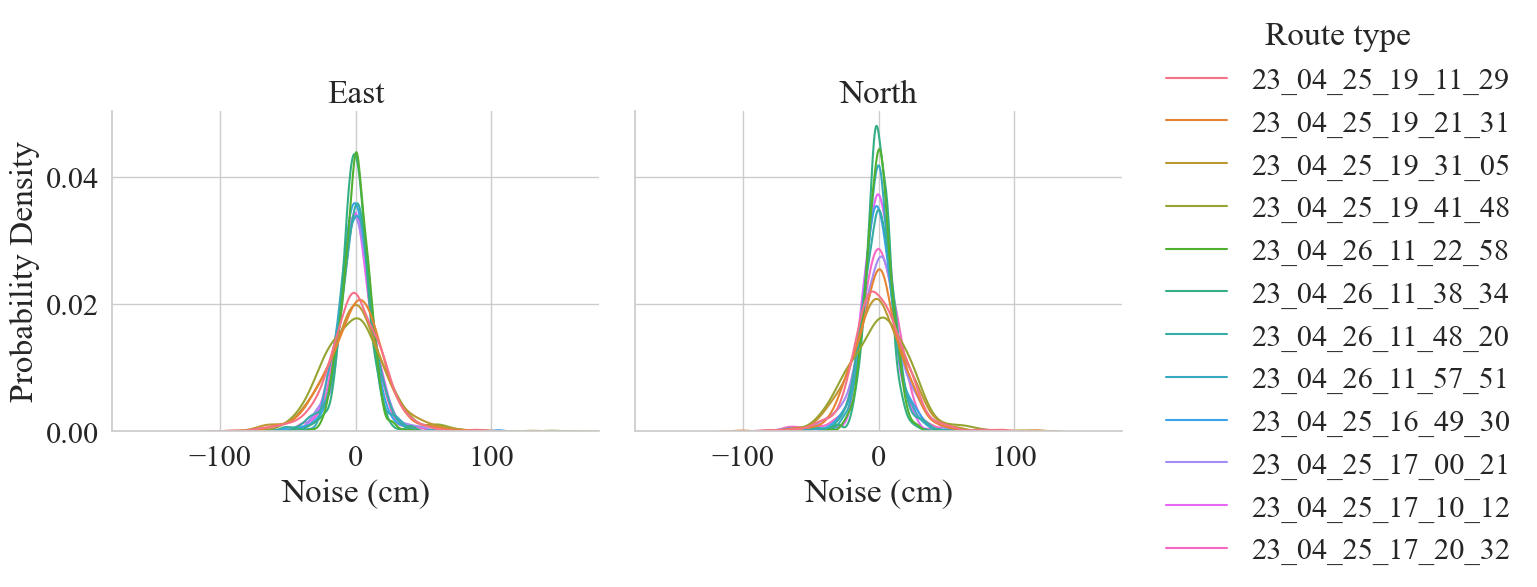

In [7]:
import numpy as np
new_df = pd.DataFrame({
    'err': np.hstack((df['err_x'].values, df['err_y'].values)),
    'phone': np.hstack((df['phone'].values, df['phone'].values)),
    'type': ['East']*len(pdf) + ['North']*len(pdf)
})
g = plot_fig(sns.displot, new_df, xlim=[-180, 180], xlabel='Noise (cm)', ylabel='Probability Density', fig_param={'font_scale':2.0}, plot_params={'x':'err', 'kind':'kde', 'aspect':1.2, 'hue':'phone', 'common_norm':False, 'col': 'type'}) # 
g.set_titles("{col_name}")
plt.show()
g.savefig('Figures/err_dist_byphone.png', dpi=150, pad_inches=0.2)

new_df = pd.DataFrame({
    'err': np.hstack((df['err_x'].values, df['err_y'].values)),
    'Route type': np.hstack((pdf['Route type'].values, pdf['Route type'].values)),
    'type': ['East']*len(pdf) + ['North']*len(pdf)
})
g = plot_fig(sns.displot, new_df, xlim=[-180, 180], xlabel='Noise (cm)', ylabel='Probability Density', fig_param={'font_scale':2.0}, plot_params={'x':'err', 'kind':'kde', 'aspect':1.2, 'hue':'Route type', 'common_norm':False, 'col': 'type'}) # 
g.set_titles("{col_name}")
plt.show()
g.savefig('Figures/err_dist_bytype.png', dpi=150, pad_inches=0.2)